In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('mwp1_CAT12_DELCODE/Antrag 137_Teipel_Regional Connectivity_20190429_Amendment_MDedit.xlsx', sheet_name='Baseline', header=1)
#print(df)
sid = df['Respeudonym']
grp = df['prmdiag']
age = df['age']
sex = df['sex_bin_1male']
tiv = df['TIV_CAT12']
field = df['FieldStrength']
grpbin = (grp > 1) # 1=CN, ...

In [2]:
# Scan for nifti file names
import glob
dataDELCODE_CN = sorted(glob.glob('mwp1_CAT12_DELCODE/0_CN/*.nii.gz'))
dataDELCODE_MCI = sorted(glob.glob('mwp1_CAT12_DELCODE/2_MCI/*.nii.gz'))
dataDELCODE_AD = sorted(glob.glob('mwp1_CAT12_DELCODE/5_AD/*.nii.gz'))
dataFiles = dataDELCODE_CN + dataDELCODE_MCI + dataDELCODE_AD
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  474  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%s' % id, x)] # extract ID numbers from filename, translate to Excel row index
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [4]:
# Load residualized data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('orig_images_wb_mwp1_MNI_DELCODE.hdf5', 'r')
hf.keys # read keys
#labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(474, 100, 100, 120, 1)


In [5]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = False #True
session = tf.Session(config=config)
set_session(session)

1.15.0


validating model newmodel_rawdata_pretrained/newmodel_wb_cv1.hdf5
Test accuracy: 69.20 %


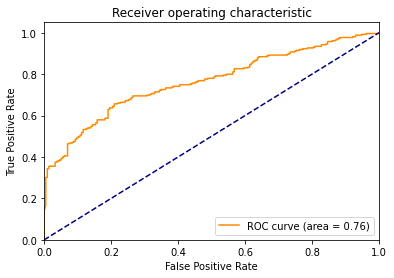

Optimal prediction threshold: 0.90634
Optimal prediction threshold: 0.82811
AUC for MCI vs. CN = 0.68
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.681
AUC for AD vs. CN = 0.886
Acc for MCI vs. CN = 63.5
Acc for AD vs. CN = 73.4
confusion matrix (naive)
[[141  74]
 [  0   0]
 [ 61  94]
 [ 11  93]]
oAcc for MCI vs. CN = 68.9
oAcc for AD vs. CN = 79.0
confusion matrix (optimized)
[[173  42]
 [  0   0]
 [ 73  82]
 [ 22  82]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv2.hdf5
Test accuracy: 73.63 %


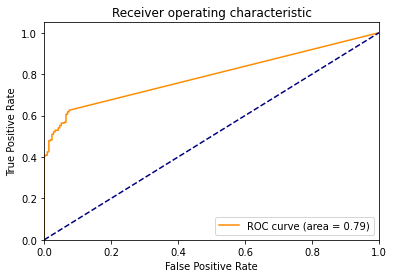

Optimal prediction threshold: 0.34234
Optimal prediction threshold: 0.38588
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.700
AUC for AD vs. CN = 0.926
Acc for MCI vs. CN = 70.5
Acc for AD vs. CN = 90.9
confusion matrix (naive)
[[202  13]
 [  0   0]
 [ 96  59]
 [ 16  88]]
oAcc for MCI vs. CN = 72.7
oAcc for AD vs. CN = 90.9
confusion matrix (optimized)
[[199  16]
 [  0   0]
 [ 85  70]
 [ 13  91]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv3.hdf5
Test accuracy: 71.94 %


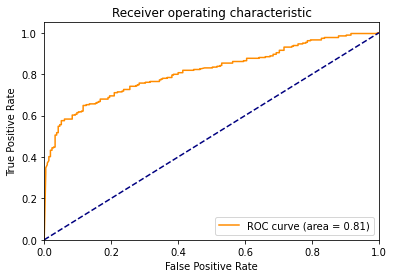

Optimal prediction threshold: 0.99435
Optimal prediction threshold: 0.99924
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.735
AUC for AD vs. CN = 0.931
Acc for MCI vs. CN = 66.5
Acc for AD vs. CN = 73.7
confusion matrix (naive)
[[140  75]
 [  0   0]
 [ 49 106]
 [  9  95]]
oAcc for MCI vs. CN = 73.2
oAcc for AD vs. CN = 88.7
confusion matrix (optimized)
[[190  25]
 [  0   0]
 [ 74  81]
 [ 18  86]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv4.hdf5
Test accuracy: 71.94 %


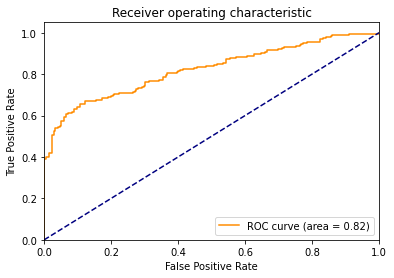

Optimal prediction threshold: 0.97630
Optimal prediction threshold: 0.98165
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.752
AUC for AD vs. CN = 0.924
Acc for MCI vs. CN = 66.5
Acc for AD vs. CN = 73.4
confusion matrix (naive)
[[139  76]
 [  0   0]
 [ 48 107]
 [  9  95]]
oAcc for MCI vs. CN = 73.2
oAcc for AD vs. CN = 88.1
confusion matrix (optimized)
[[189  26]
 [  0   0]
 [ 73  82]
 [ 14  90]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv5.hdf5
Test accuracy: 71.31 %


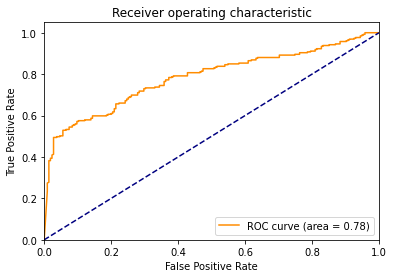

Optimal prediction threshold: 0.11101
Optimal prediction threshold: 0.99702
AUC for MCI vs. CN = 0.71
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.710
AUC for AD vs. CN = 0.891
Acc for MCI vs. CN = 67.0
Acc for AD vs. CN = 76.5
confusion matrix (naive)
[[154  61]
 [  0   0]
 [ 61  94]
 [ 14  90]]
oAcc for MCI vs. CN = 66.2
oAcc for AD vs. CN = 86.2
confusion matrix (optimized)
[[135  80]
 [  0   0]
 [ 45 110]
 [ 12  92]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv6.hdf5
Test accuracy: 75.32 %


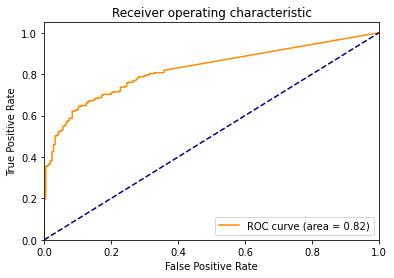

Optimal prediction threshold: 0.85281
Optimal prediction threshold: 0.98551
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.753
AUC for AD vs. CN = 0.927
Acc for MCI vs. CN = 70.3
Acc for AD vs. CN = 78.7
confusion matrix (naive)
[[154  61]
 [  0   0]
 [ 49 106]
 [  7  97]]
oAcc for MCI vs. CN = 72.4
oAcc for AD vs. CN = 88.4
confusion matrix (optimized)
[[177  38]
 [  0   0]
 [ 64  91]
 [ 14  90]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv7.hdf5
Test accuracy: 70.89 %


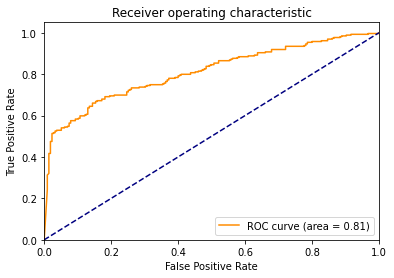

Optimal prediction threshold: 0.98540
Optimal prediction threshold: 0.99684
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.729
AUC for AD vs. CN = 0.927
Acc for MCI vs. CN = 64.6
Acc for AD vs. CN = 72.7
confusion matrix (naive)
[[135  80]
 [  0   0]
 [ 51 104]
 [  7  97]]
oAcc for MCI vs. CN = 70.5
oAcc for AD vs. CN = 86.8
confusion matrix (optimized)
[[176  39]
 [  0   0]
 [ 70  85]
 [ 11  93]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv8.hdf5
Test accuracy: 68.78 %


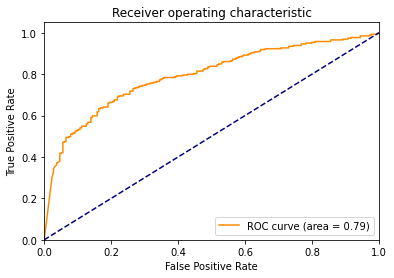

Optimal prediction threshold: 0.99380
Optimal prediction threshold: 0.99920
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.716
AUC for AD vs. CN = 0.905
Acc for MCI vs. CN = 60.8
Acc for AD vs. CN = 66.8
confusion matrix (naive)
[[112 103]
 [  0   0]
 [ 42 113]
 [  3 101]]
oAcc for MCI vs. CN = 69.2
oAcc for AD vs. CN = 83.7
confusion matrix (optimized)
[[167  48]
 [  0   0]
 [ 66  89]
 [ 14  90]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv9.hdf5
Test accuracy: 69.41 %


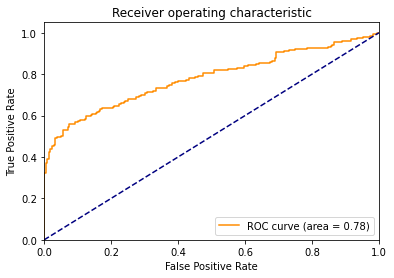

Optimal prediction threshold: 0.97652
Optimal prediction threshold: 0.97885
AUC for MCI vs. CN = 0.69
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.692
AUC for AD vs. CN = 0.911
Acc for MCI vs. CN = 63.2
Acc for AD vs. CN = 71.5
confusion matrix (naive)
[[133  82]
 [  0   0]
 [ 54 101]
 [  9  95]]
oAcc for MCI vs. CN = 70.5
oAcc for AD vs. CN = 87.8
confusion matrix (optimized)
[[199  16]
 [  0   0]
 [ 93  62]
 [ 22  82]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv10.hdf5
Test accuracy: 73.42 %


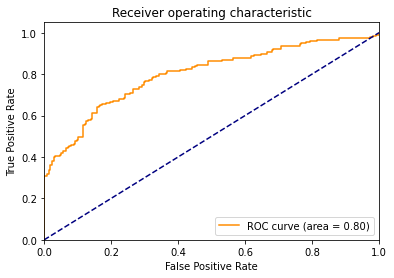

Optimal prediction threshold: 0.43837
Optimal prediction threshold: 0.93329
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.729
AUC for AD vs. CN = 0.904
Acc for MCI vs. CN = 68.6
Acc for AD vs. CN = 75.9
confusion matrix (naive)
[[148  67]
 [  0   0]
 [ 49 106]
 [ 10  94]]
oAcc for MCI vs. CN = 68.4
oAcc for AD vs. CN = 84.0
confusion matrix (optimized)
[[145  70]
 [  0   0]
 [ 47 108]
 [  9  95]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv11.hdf5
Test accuracy: 73.84 %


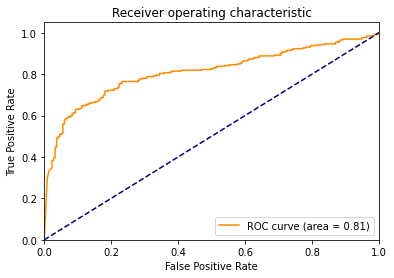

Optimal prediction threshold: 0.84893
Optimal prediction threshold: 0.99523
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.724
AUC for AD vs. CN = 0.936
Acc for MCI vs. CN = 68.1
Acc for AD vs. CN = 76.2
confusion matrix (naive)
[[145  70]
 [  0   0]
 [ 48 107]
 [  6  98]]
oAcc for MCI vs. CN = 71.9
oAcc for AD vs. CN = 89.0
confusion matrix (optimized)
[[165  50]
 [  0   0]
 [ 54 101]
 [  8  96]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv12.hdf5
Test accuracy: 76.58 %


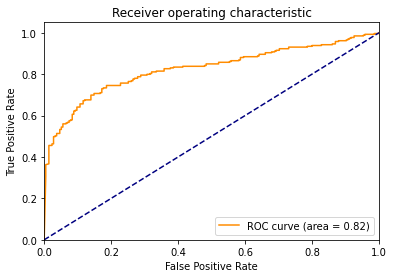

Optimal prediction threshold: 0.62663
Optimal prediction threshold: 0.99320
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.755
AUC for AD vs. CN = 0.929
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 82.4
confusion matrix (naive)
[[170  45]
 [  0   0]
 [ 55 100]
 [ 11  93]]
oAcc for MCI vs. CN = 74.1
oAcc for AD vs. CN = 89.0
confusion matrix (optimized)
[[175  40]
 [  0   0]
 [ 56  99]
 [ 11  93]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv13.hdf5
Test accuracy: 73.00 %


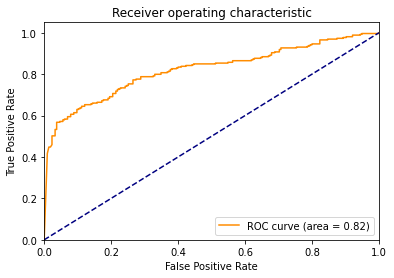

Optimal prediction threshold: 0.86226
Optimal prediction threshold: 0.99962
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.749
AUC for AD vs. CN = 0.928
Acc for MCI vs. CN = 67.6
Acc for AD vs. CN = 72.7
confusion matrix (naive)
[[136  79]
 [  0   0]
 [ 41 114]
 [  8  96]]
oAcc for MCI vs. CN = 70.5
oAcc for AD vs. CN = 88.7
confusion matrix (optimized)
[[153  62]
 [  0   0]
 [ 47 108]
 [  9  95]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv14.hdf5
Test accuracy: 73.42 %


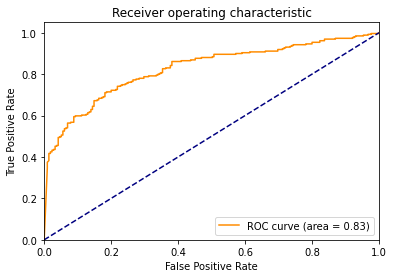

Optimal prediction threshold: 0.98649
Optimal prediction threshold: 0.99599
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.758
AUC for AD vs. CN = 0.928
Acc for MCI vs. CN = 67.6
Acc for AD vs. CN = 74.9
confusion matrix (naive)
[[141  74]
 [  0   0]
 [ 46 109]
 [  6  98]]
oAcc for MCI vs. CN = 72.7
oAcc for AD vs. CN = 85.0
confusion matrix (optimized)
[[176  39]
 [  0   0]
 [ 62  93]
 [ 14  90]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv15.hdf5
Test accuracy: 67.72 %


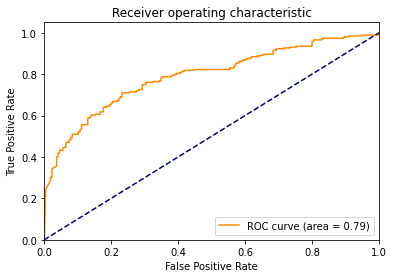

Optimal prediction threshold: 0.99080
Optimal prediction threshold: 0.99913
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.722
AUC for AD vs. CN = 0.892
Acc for MCI vs. CN = 60.5
Acc for AD vs. CN = 64.3
confusion matrix (naive)
[[108 107]
 [  0   0]
 [ 39 116]
 [  7  97]]
oAcc for MCI vs. CN = 70.0
oAcc for AD vs. CN = 84.0
confusion matrix (optimized)
[[165  50]
 [  0   0]
 [ 61  94]
 [ 15  89]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv16.hdf5
Test accuracy: 67.93 %


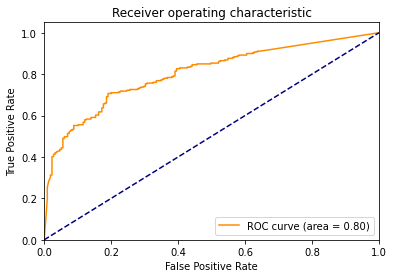

Optimal prediction threshold: 0.99073
Optimal prediction threshold: 0.99978
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.734
AUC for AD vs. CN = 0.908
Acc for MCI vs. CN = 60.0
Acc for AD vs. CN = 60.8
confusion matrix (naive)
[[ 94 121]
 [  0   0]
 [ 27 128]
 [  4 100]]
oAcc for MCI vs. CN = 72.4
oAcc for AD vs. CN = 86.8
confusion matrix (optimized)
[[174  41]
 [  0   0]
 [ 61  94]
 [ 16  88]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv17.hdf5
Test accuracy: 75.95 %


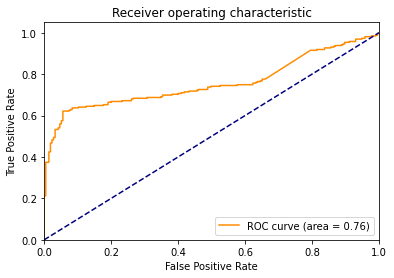

Optimal prediction threshold: 0.55231
Optimal prediction threshold: 0.62785
AUC for MCI vs. CN = 0.65
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.651
AUC for AD vs. CN = 0.913
Acc for MCI vs. CN = 72.7
Acc for AD vs. CN = 90.6
confusion matrix (naive)
[[198  17]
 [  0   0]
 [ 84  71]
 [ 13  91]]
oAcc for MCI vs. CN = 73.5
oAcc for AD vs. CN = 91.8
confusion matrix (optimized)
[[203  12]
 [  0   0]
 [ 86  69]
 [ 13  91]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv18.hdf5
Test accuracy: 72.57 %


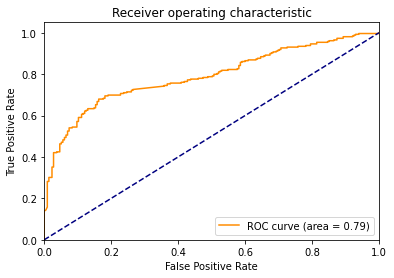

Optimal prediction threshold: 0.65929
Optimal prediction threshold: 0.72111
AUC for MCI vs. CN = 0.71
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.710
AUC for AD vs. CN = 0.908
Acc for MCI vs. CN = 68.1
Acc for AD vs. CN = 78.7
confusion matrix (naive)
[[159  56]
 [  0   0]
 [ 62  93]
 [ 12  92]]
oAcc for MCI vs. CN = 71.4
oAcc for AD vs. CN = 84.3
confusion matrix (optimized)
[[176  39]
 [  0   0]
 [ 67  88]
 [ 14  90]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv19.hdf5
Test accuracy: 75.32 %


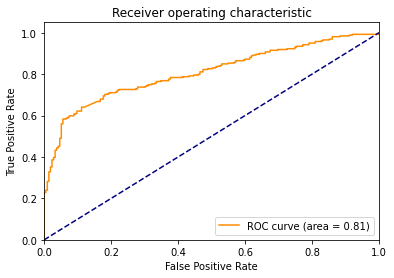

Optimal prediction threshold: 0.49163
Optimal prediction threshold: 0.89309
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.740
AUC for AD vs. CN = 0.908
Acc for MCI vs. CN = 71.9
Acc for AD vs. CN = 83.7
confusion matrix (naive)
[[176  39]
 [  0   0]
 [ 65  90]
 [ 13  91]]
oAcc for MCI vs. CN = 71.9
oAcc for AD vs. CN = 87.5
confusion matrix (optimized)
[[176  39]
 [  0   0]
 [ 65  90]
 [ 13  91]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv20.hdf5
Test accuracy: 72.78 %


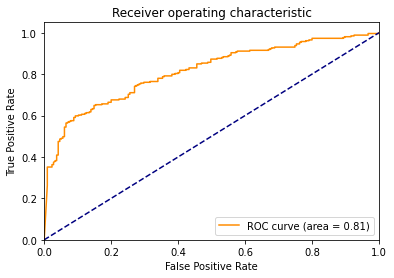

Optimal prediction threshold: 0.98745
Optimal prediction threshold: 0.99937
AUC for MCI vs. CN = 0.75
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.746
AUC for AD vs. CN = 0.911
Acc for MCI vs. CN = 67.8
Acc for AD vs. CN = 75.5
confusion matrix (naive)
[[147  68]
 [  0   0]
 [ 51 104]
 [ 10  94]]
oAcc for MCI vs. CN = 71.4
oAcc for AD vs. CN = 87.5
confusion matrix (optimized)
[[182  33]
 [  0   0]
 [ 73  82]
 [ 18  86]]


In [6]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(images, batch_size=batch_size)
    acc_all = np.mean((labels[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [2,5]:
      grpi = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(grps.Group.to_numpy(dtype=np.int), np.zeros((grps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(labels[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((labels[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((labels[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[5])
    auc_AD.append(roc_auc[5])
    auc_MCI.append(roc_auc[2])
    acc_AD.append(acc[5])
    acc_MCI.append(acc[2])
    opt_acc_AD.append(opt_acc[5])
    opt_acc_MCI.append(opt_acc[2])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[5])
    print('Acc for MCI vs. CN = %0.1f' % acc[2])
    print('Acc for AD vs. CN = %0.1f' % acc[5])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(grps.Group, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[2])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[5])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(grps.Group, (pred[:, 1]>thresh[2]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [7]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

Acc for all test data = 72.2 +/- 2.6
AUC for all test data = 0.801 +/- 0.020
AUC for MCI vs. CN = 0.724 +/- 0.028
AUC for AD vs. CN = 0.915 +/- 0.015
Mean Acc for MCI vs. CN = 66.9 +/- 3.9
Mean Acc for AD vs. CN = 75.7 +/- 7.5
Mean oAcc for MCI vs. CN = 71.3 +/- 2.0
Mean oAcc for AD vs. CN = 86.9 +/- 2.9


In [8]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       69.198312  0.763518  0.681425  0.885868  63.513514  73.354232   
1       73.628692  0.790868  0.700015  0.926275  70.540541  90.909091   
2       71.940928  0.813567  0.734659  0.931172  66.486486  73.667712   
3       71.940928  0.820903  0.751628  0.924150  66.486486  73.354232   
4       71.308017  0.782850  0.710083  0.891301  67.027027  76.489028   
5       75.316456  0.822798  0.752888  0.926990  70.270270  78.683386   
6       70.886076  0.808889  0.729422  0.927326  64.594595  72.727273   
7       68.776371  0.791991  0.715904  0.905389  60.810811  66.771160   
8       69.409283  0.779887  0.692243  0.910510  63.243243  71.473354   
9       73.417722  0.799300  0.728972  0.904114  68.648649  75.862069   
10      73.839662  0.809311  0.724396  0.935868  68.108108  76.175549   
11      76.582278  0.824648  0.754869  0.928645  72.972973  82.445141   
12      72.995781  0.820427  0.748567  0.927527  67